<a href="https://colab.research.google.com/github/seokjinwoo/AIandEcon/blob/main/lec6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Linear Regression 단순선형회귀모형

- machine learning 의 기초 모형

$$
Y_i = \beta_0 + \beta_1 X_i + e_i
$$

- 이 모형에 대한 가정을 했음
- 선형모형, 등분산성, 외생성 기타 등등

- 오차의 제곱의 합

$$
\sum_{i=1}^n e_i^2
$$

- OLS(ordinary least square) 추정량(estimator)

$$
\hat{\beta}_1 = \frac{ \sum_{i=1}^n (X_i - \bar{X}) (Y_i - \bar{Y})}{ \sum_{i=1}^n (X_i - \bar{X})^2 }
$$








In [ ]:
import pandas as pd

df = pd.read_csv('/content/galton.csv')
# df.head()

# df.describe()



In [ ]:
# 자녀의 키 height 를 아빠의 father 로 설명할 수 있느냐?
# height = a + b father + e (ignoring i for a while)

import statsmodels.formula.api as smf

model = smf.ols(formula = 'height ~ father', data = df)
result = model.fit()
print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     73.51
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           4.35e-17
Time:                        06:45:59   Log-Likelihood:                -2384.3
No. Observations:                 898   AIC:                             4773.
Df Residuals:                     896   BIC:                             4782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1104      3.227     12.120      0.0

- 아빠가 1 키가 크면은, 자녀는 0.4 정도 키가 크다
- 5% 유의수준에서 $\beta_1 = 0$ 이라는 귀무가설(null hypothesis)을 기각할 수 있음

- 아빠를 엄마로 바꿔서 회귀분석

### 실습

- $y_i = 1 + x_i + e_i $
- $e \sim N(0, 2^2)$
- $x \sim N(1 , 3^2)$

In [ ]:
# data generation

import numpy as np
import pandas as pd

np.random.seed(123456)

x = np.random.normal(loc = 1, scale = 3, size = 1000)
e = np.random.normal(loc = 0, scale = 2, size = 1000)

y = 1 + x + e

df = pd.DataFrame({'x': x, 'y': y})
# df.head()

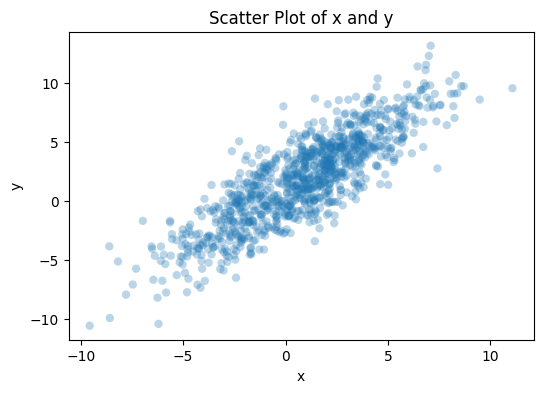

In [ ]:
# prompt: x와 y의 산포도 그려주세여

import matplotlib.pyplot as plt

# Assuming 'x' and 'y' are already defined from the previous code
plt.figure(figsize=(6, 4))
plt.scatter(df['x'], df['y'], alpha = 0.3, edgecolors='none')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x and y")
plt.show()


In [ ]:


import statsmodels.formula.api as smf

model = smf.ols(formula = 'y ~ x', data = df)
result = model.fit()
print(result.summary())






                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     2504.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          2.58e-274
Time:                        07:47:09   Log-Likelihood:                -2112.0
No. Observations:                1000   AIC:                             4228.
Df Residuals:                     998   BIC:                             4238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0159      0.066     15.472      0.0

In [ ]:
import pandas as pd

df = pd.read_csv('/content/auto.csv')

In [ ]:
#  df의 price(자동차 가격)와 mpg(자동차 연비)의 산포도


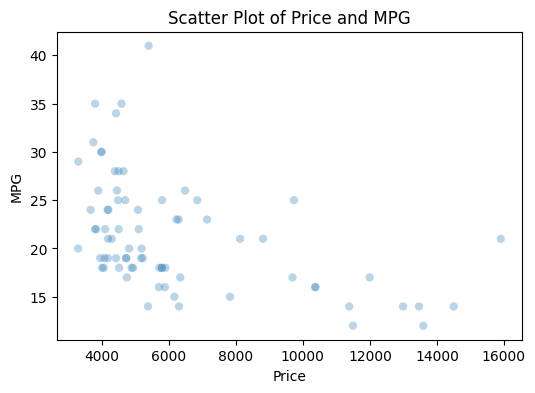

In [ ]:
# prompt: #  df의 price(자동차 가격)와 mpg(자동차 연비)의 산포도

# Assuming 'df' is already defined from the previous code and contains 'price' and 'mpg' columns.
plt.figure(figsize=(6, 4))
plt.scatter(df['price'], df['mpg'], alpha=0.3, edgecolors='none')
plt.xlabel("Price")
plt.ylabel("MPG")
plt.title("Scatter Plot of Price and MPG")
plt.show()


- 종속변수를 price 로 하고 독립변수를 mpg 로 하는 회귀모형을 쓰고
- 계수를 추정하시오.

- 모형: $price_i = a + b \times mpg_i + e_i$

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols('price ~ mpg', data = df)

results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     20.26
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           2.55e-05
Time:                        08:07:12   Log-Likelihood:                -686.54
No. Observations:                  74   AIC:                             1377.
Df Residuals:                      72   BIC:                             1382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.125e+04   1170.813      9.611      0.0

- 위와 동일한 회귀분석을
- price -> log(price), mpg -> log(mpg) 로 바꿔서 회귀분석

